# $\pi$ approximation by Monte Carlo sampling
We estimate $\pi$ with a loop by calculting the number of random points in the xy plane that fall insidea circle of radius 1. We assume the density $\delta$ of N random points in a square of area $R^2/4$ and those $N_C$ in a circle inside it of area $\pi R^2$ to be the same, so that 
$$N = \frac{\delta R^2}{4}$$
$$N_C = \delta \pi R^2$$
and
$$\pi = \frac{4N_C}{N}$$


In [10]:
import numpy as np
import time
import argparse
import matplotlib.pyplot as plt

In [9]:
np.random.seed(0)  # force repeatable plt
nbr_items = int(1E4)
xs = np.random.uniform(0, 1, nbr_items)
ys = np.random.uniform(0, 1, nbr_items)
estimate_inside_quarter_unit_circle = (xs * xs + ys * ys) <= 1
nbr_trials_in_quarter_unit_circle = np.sum(estimate_inside_quarter_unit_circle)
pi = (nbr_trials_in_quarter_unit_circle * 4) / nbr_items  # estimate for the full circle
print('PI estimate: {:.5f}'.format(pi))

PI estimate: 3.14720


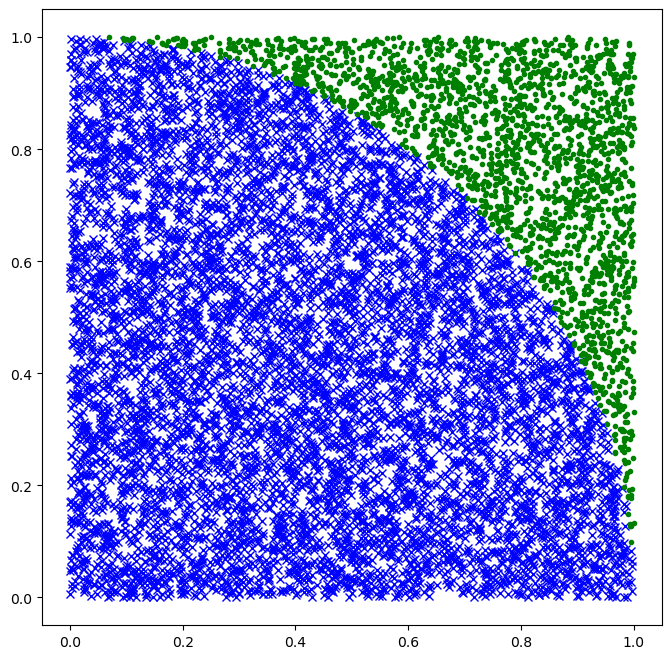

In [4]:
plt.figure(1, figsize=(8, 8))
plt.clf()
plt.plot(xs[estimate_inside_quarter_unit_circle], ys[estimate_inside_quarter_unit_circle], 'bx')
plt.plot(xs[estimate_inside_quarter_unit_circle == False], ys[estimate_inside_quarter_unit_circle == False], 'g.')

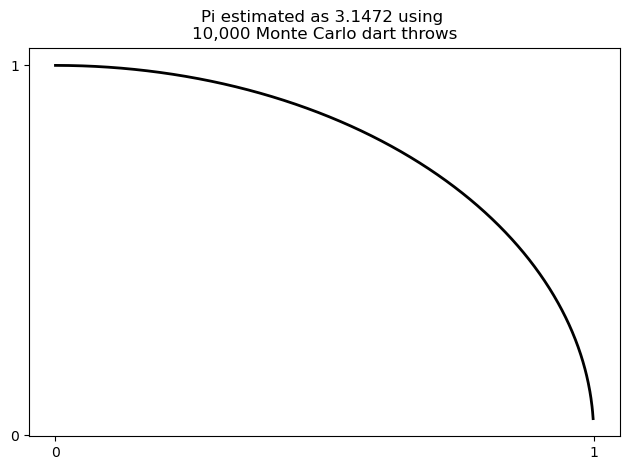

In [5]:
unit_circle_xs = np.arange(0, 1, 0.001)
unit_circle_ys = np.sin(np.arccos(unit_circle_xs))
plt.plot(unit_circle_xs, unit_circle_ys, linewidth=2, c="k")
plt.xticks([0.0, 1.0])
plt.yticks([0.0, 1.0])
plt.title("Pi estimated as {} using \n{:,} Monte Carlo dart throws".format(pi, int(nbr_items)))
plt.tight_layout()